## Importar Librerías

In [48]:
# Librerías básicas
import numpy as np
import pandas as pd

# Librerías de procesamiento
from sklearn.preprocessing import RobustScaler

# Librerías del modelo 
from sklearn.ensemble import RandomForestClassifier

# Librerías de entrenamiento
from sklearn.model_selection import train_test_split
from sklearn import metrics 

## Import Dataset

In [49]:
df = pd.read_csv('.\\diabetic_data_processed.csv').drop(['Unnamed: 0','race','max_glu_serum','A1Cresult'], axis=1)
#df.shape
#df["readmitted"].unique()
#df.head()
#df.groupby(["readmitted"]).count()
#df.describe()
#df.info()

In [50]:
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Female,[0-10),5,18,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Female,[10-20),1,1,7,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,Female,[20-30),1,1,7,2,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,Male,[30-40),1,1,7,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Male,[40-50),1,1,7,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Pre-Processing

In [51]:
# make gender and outcome numerical
df = df[df.gender != 'Unknown/Invalid']
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Code adapted from: https://www.kaggle.com/code/andreshg/churn-prediction-0-99-auc-h2o-sklearn-smote#2.-Feature-Engeneering
catcols = df.drop('readmitted', axis=1).select_dtypes(exclude = ['int64']).columns
intcols = df.select_dtypes(include = ['int64']).columns

# one-hot encoding on categorical columns
df = pd.get_dummies(df, columns = catcols)

# scaling numeric features 
for col in df[intcols]:
    df[col] = RobustScaler().fit_transform(df[[col]])
    
print('New Number of Features: %d'%(df.shape[1]))  

New Number of Features: 96


In [52]:
# split into X and y
X = df.drop('readmitted', axis = 1)
y = df['readmitted']

## Feature Selection

In [53]:
forest = RandomForestClassifier(n_estimators = 100, max_depth = 19, random_state = 0)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 42)
    
forest.fit(train_x,train_y)
forest.score(test_x, test_y)
pred_test = forest.predict(test_x)

f1 = metrics.f1_score(test_y, pred_test, average = 'weighted')
test_acc = metrics.accuracy_score(test_y, pred_test)
con = metrics.confusion_matrix(test_y, pred_test)
precision = metrics.precision_score(test_y, pred_test, average = 'weighted')
recall = metrics.recall_score(test_y, pred_test, average = 'weighted')

In [54]:
print('Accuracy Score', test_acc)
print('Precision', precision)
print('Recall', recall)
print('F1-Score', f1)
print(con)

Accuracy Score 0.5845682166581502
Precision 0.5545072937128047
Recall 0.5845682166581502
F1-Score 0.5266809567288755
[[   21  1016  1833]
 [   21  2953  5908]
 [    6  1785 11898]]


In [55]:
#cross validation
from sklearn.model_selection import cross_validate 

cv_results = cross_validate(forest, X, y, scoring = ('f1_weighted'), cv = 5)
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score']

<Axes: >

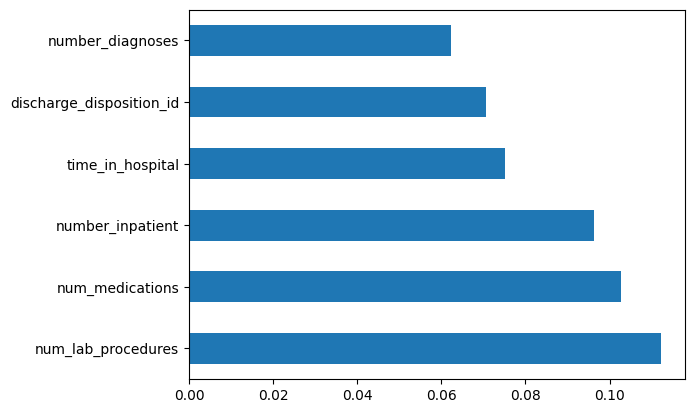

In [56]:
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')

## Apply final model

In [58]:
X = df[['num_lab_procedures', 'num_medications', 'number_inpatient', 'time_in_hospital', 'discharge_disposition_id', 'number_diagnoses']]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 42)
    
forest.fit(train_x,train_y)
forest.score(test_x, test_y)
pred_test = forest.predict(test_x)

f1 = metrics.f1_score(test_y, pred_test, average = 'weighted')
test_acc = metrics.accuracy_score(test_y, pred_test)
con = metrics.confusion_matrix(test_y, pred_test)
precision = metrics.precision_score(test_y, pred_test, average = 'weighted')
recall = metrics.recall_score(test_y, pred_test, average = 'weighted')

In [59]:
print('Accuracy Score', test_acc)
print('Precision', precision)
print('Recall', recall)
print('F1-Score', f1)
print(con)

Accuracy Score 0.5577217876655792
Precision 0.5141201519001809
Recall 0.5577217876655792
F1-Score 0.5155233781618596
[[  123  1042  1705]
 [  186  3049  5647]
 [  145  2527 11017]]
